In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train=pd.read_csv(r"C:\Users\HPPC\Downloads\train_LZdllcl.csv")
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train.shape

(54808, 14)

In [5]:
train.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [6]:
(train.isnull().sum()/train.shape[0])*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

#### Education column has about 4.5% and previous year rating has about 7.5% of values missing.

# Exploratory Data Analysis

## Univariate Analysis

Sales & Marketing    30.725442
Operations           20.705007
Procurement          13.023646
Technology           13.023646
Analytics             9.764998
Finance               4.627062
HR                    4.411765
Legal                 1.895709
R&D                   1.822727
Name: department, dtype: float64

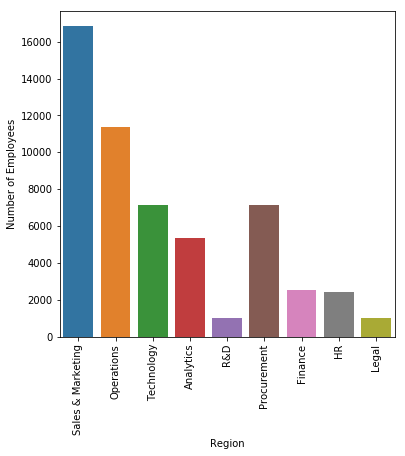

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(train["department"])
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Number of Employees")
count_dept=(train["department"].value_counts()/train.shape[0])*100
count_dept

region_2     22.520435
region_22    11.728215
region_7      8.836301
region_15     5.123340
region_13     4.831411
Name: region, dtype: float64

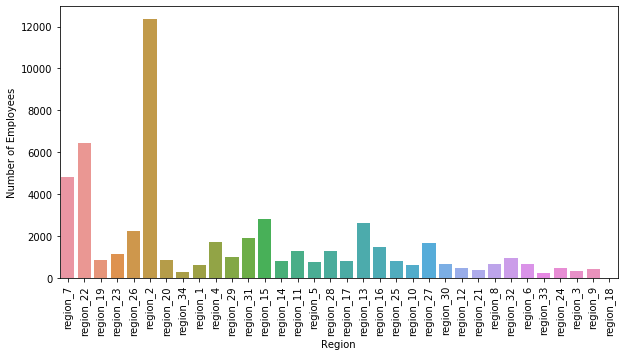

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(train["region"])
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Number of Employees")
count_region=(train["region"].value_counts()/train.shape[0])*100
count_region.head()

m    70.237921
f    29.762079
Name: gender, dtype: float64

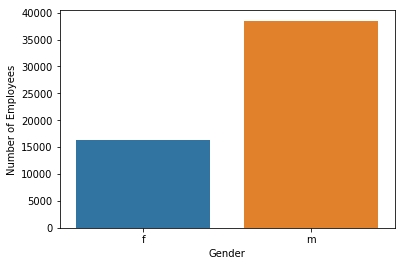

In [8]:
count_gender=(train["gender"].value_counts()/train.shape[0])*100
sns.countplot(train["gender"])
plt.xlabel("Gender")
plt.ylabel("Number of Employees")
count_gender

Bachelor's          66.904467
Master's & above    27.231426
Below Secondary      1.468764
Name: education, dtype: float64

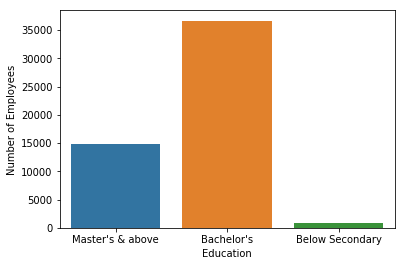

In [9]:
sns.countplot(train["education"])
plt.xlabel("Education")
plt.ylabel("Number of Employees")

count_education=(train["education"].value_counts()/train.shape[0])*100
count_education

other       55.550285
sourcing    42.366078
referred     2.083637
Name: recruitment_channel, dtype: float64

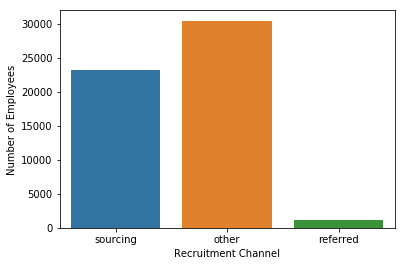

In [10]:
sns.countplot(train["recruitment_channel"])
plt.xlabel("Recruitment Channel")
plt.ylabel("Number of Employees")

count_channel=(train["recruitment_channel"].value_counts()/train.shape[0])*100
count_channel

1    80.969931
2    14.572690
3     3.240403
4     0.853890
5     0.233543
Name: no_of_trainings, dtype: float64

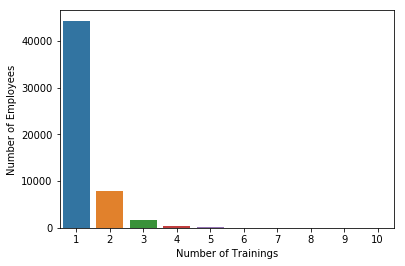

In [11]:
sns.countplot(train["no_of_trainings"])
plt.xlabel("Number of Trainings")
plt.ylabel("Number of Employees")

count_training=(train["no_of_trainings"].value_counts()/train.shape[0])*100
count_training.head()

Text(0.5, 0, 'Age')

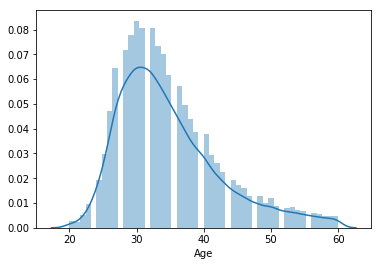

In [12]:
sns.distplot(train["age"])
plt.xlabel("Age")

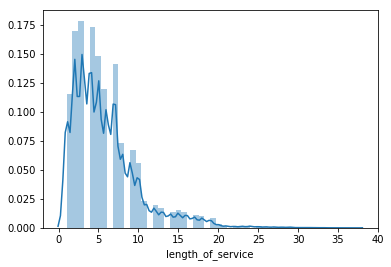

In [13]:
sns.distplot(train["length_of_service"])

0    64.802584
1    35.197416
Name: KPIs_met >80%, dtype: float64

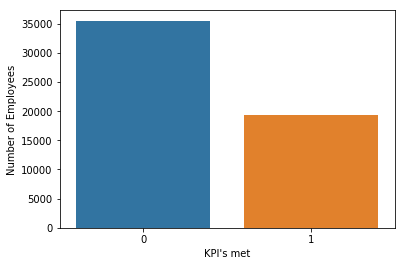

In [14]:
sns.countplot(train["KPIs_met >80%"])
plt.xlabel("KPI's met")
plt.ylabel("Number of Employees")

count_kpi=(train["KPIs_met >80%"].value_counts()/train.shape[0])*100
count_kpi.head()

0    97.68282
1     2.31718
Name: awards_won?, dtype: float64

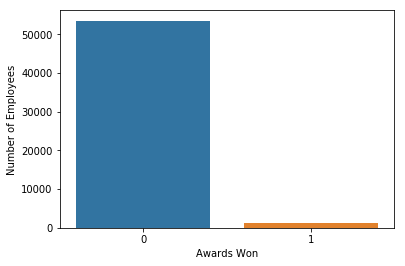

In [15]:
sns.countplot(train["awards_won?"])
plt.xlabel("Awards Won")
plt.ylabel("Number of Employees")

count_awards=(train["awards_won?"].value_counts()/train.shape[0])*100
count_awards.head()

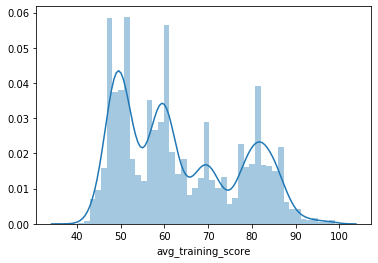

In [17]:
sns.distplot(train["avg_training_score"])

# Inferences After Univariate Analysis
1) Major number of employees belong to Sales and Marketing department (Approx 30%), followed by Operations (20.70%) and Procurement (13.02%).

2) About (+22.52%) which is about (12000) of total employees belong to region 2, followed by region 22 (11.72%)  and so on.

3) Male employee percentage is (+70.23%) which is about 37000. Showing high Gender imbalance.

4) Majority of employees are having Bachelor's degree which is about (66.90%) which about 35000+ employees. It seems Under Graduation is mandatory requirement while recruiting or to work here.

5) Prefered Recruiting channel by the company is other than sourcing and referral. Aboue (55.55%) employees are recruited through other mode of recruitment followed by sourcing (42.36%) mode of recruitment.

6) 80.96% of total employees have completed only one training. There are hardly any employees who have completed more than 6 trainings.

7) Age shows pretty much a normal distribution with majority of employees lying the age group 27-35 which is pretty much expected.

8) Length of service shows a bit of rightly skewed distribution. With majority of employees having work experience of about 1-5 years.

9) Average Training Score shows a descent distribution. With high number of employess lying in the range 50-60, which shows descent performance.

10) Among total employees 64.80% employees have not met their KPI's > 80% which is approx 35000 employees and that's a alarming number.

11) Percentage of people who have won awards is drastically low making it to only (2.3%) of total employees which is also not so good sign.

## Bivariate Analysis

In [18]:
train["is_promoted"]=train["is_promoted"].replace(0,"No")
train["is_promoted"]=train["is_promoted"].replace(1,"Yes")

is_promoted,No,Yes,Total,Promoted %
department,,,,
Analytics,4840,512,5352,9.566517
Finance,2330,206,2536,8.123028
HR,2282,136,2418,5.624483
Legal,986,53,1039,5.101059
Operations,10325,1023,11348,9.014804
Procurement,6450,688,7138,9.638554
R&D,930,69,999,6.906907
Sales & Marketing,15627,1213,16840,7.203088
Technology,6370,768,7138,10.759316


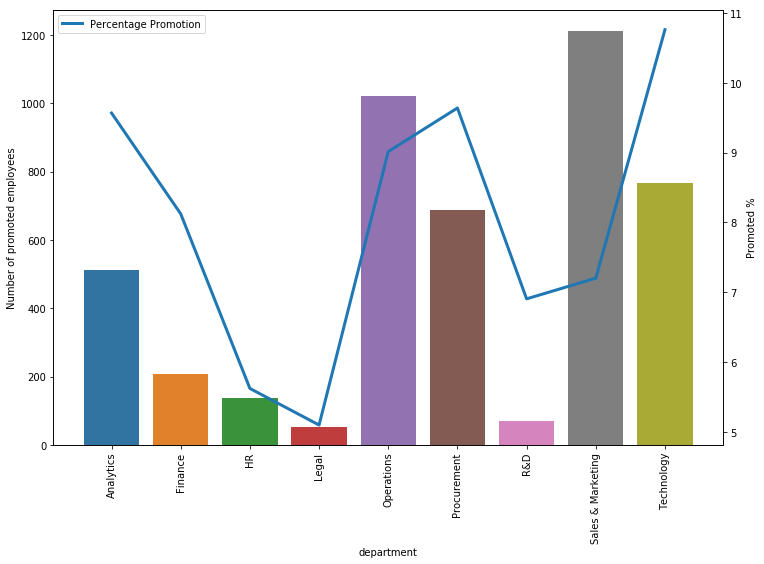

In [19]:
table1=pd.crosstab(train["department"],train["is_promoted"])
table1["Total"]=table1["No"]+table1["Yes"]
table1["Promoted %"]=(table1["Yes"]/table1["Total"])*100

fig,ax1=plt.subplots(figsize=(12,8))
sns.barplot(x=table1.index,y=table1["Yes"],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of promoted employees")
ax2=ax1.twinx()
sns.lineplot(table1.index,table1["Promoted %"],ax=ax2,linewidth=3,label="Percentage Promotion")
table1

is_promoted,No,Yes,Total,Promoted %
region,,,,
region_4,1457,246,1703,14.445097
region_17,687,109,796,13.693467
region_25,716,103,819,12.576313
region_28,1164,154,1318,11.684370
region_23,1038,137,1175,11.659574
region_22,5694,734,6428,11.418793
region_3,309,37,346,10.693642
region_7,4327,516,4843,10.654553
region_1,552,58,610,9.508197


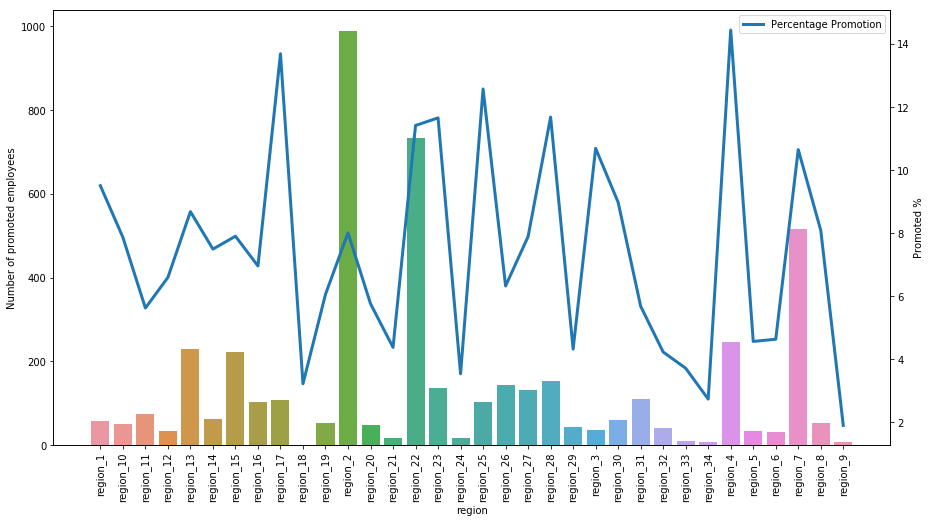

In [21]:
table2=pd.crosstab(train["region"],train["is_promoted"])
table2["Total"]=table2["No"]+table2["Yes"]
table2["Promoted %"]=(table2["Yes"]/table2["Total"])*100

fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x=table2.index,y=table2["Yes"],ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel="Number of promoted employees")
ax2=ax1.twinx()
sns.lineplot(table2.index,table2["Promoted %"],ax=ax2,linewidth=3,label="Percentage Promotion")
table2.sort_values(by='Promoted %',ascending=False).head(10)

is_promoted,No,Yes,Total,Promoted %
education,,,,
Bachelor's,33661,3008,36669,8.203114
Below Secondary,738,67,805,8.322981
Master's & above,13454,1471,14925,9.855946


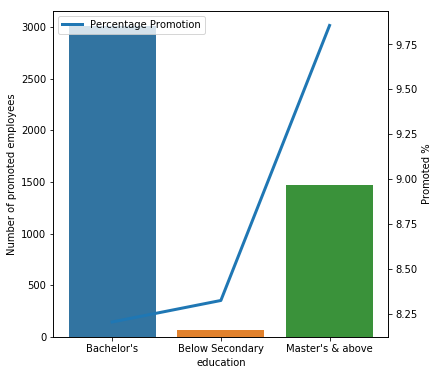

In [28]:
table3=pd.crosstab(train["education"],train["is_promoted"])
table3["Total"]=table3["No"]+table3["Yes"]
table3["Total"]=table3["Yes"]+table3["No"]
table3["Promoted %"]=(table3["Yes"]/table3["Total"])*100

fig,ax1=plt.subplots(figsize=(6,6))
sns.barplot(x=table3.index,y=table3["Yes"],ax=ax1)
ax1.set(ylabel="Number of promoted employees")
ax2=ax1.twinx()
sns.lineplot(table3.index,table3["Promoted %"],ax=ax2,linewidth=3,label="Percentage Promotion")
table3

is_promoted,No,Yes,Total,Promoted %
gender,,,,
f,14845,1467,16312,8.993379
m,35295,3201,38496,8.315150


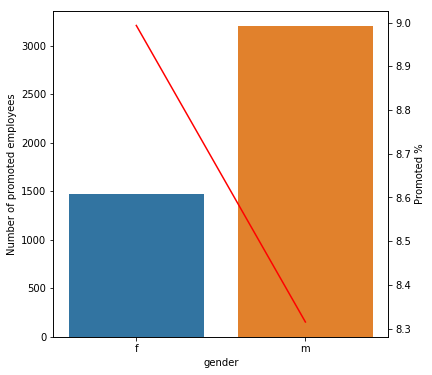

In [29]:
table4=pd.crosstab(train["gender"],train["is_promoted"])
table4["Total"]=table4["No"]+table4["Yes"]
table4["Promoted %"]=(table4["Yes"]/table4["Total"])*100

fig,ax1=plt.subplots(figsize=(6,6))
sns.barplot(x=table4.index,y=table4["Yes"],ax=ax1)
ax1.set(ylabel="Number of promoted employees")
ax2=ax1.twinx()
sns.lineplot(table4.index,table4['Promoted %'],ax=ax2,color="red")
table4

is_promoted,No,Yes,Total,Promoted %
awards_won?,,,,
0,49429,4109,53538,7.674922
1,711,559,1270,44.015748


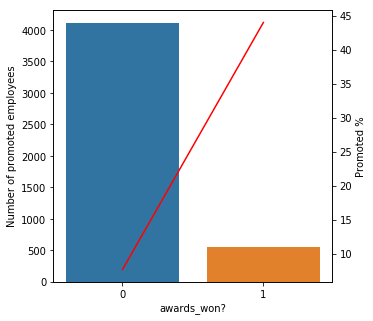

In [30]:
table5=pd.crosstab(train["awards_won?"],train["is_promoted"])
table5["Total"]=table5["No"]+table5["Yes"]
table5["Total"]=table5["Yes"]+table5["No"]
table5["Promoted %"]=(table5["Yes"]/table5["Total"])*100

fig,ax1=plt.subplots(figsize=(5,5))
sns.barplot(x=table5.index,y=table5["Yes"],ax=ax1)
ax1.set(ylabel="Number of promoted employees")
ax2=ax1.twinx()
sns.lineplot(table5.index,table5['Promoted %'],ax=ax2,color="red")
table5

is_promoted,No,Yes,Total,Promoted %
KPIs_met >80%,,,,
0,34111,1406,35517,3.958668
1,16029,3262,19291,16.909440


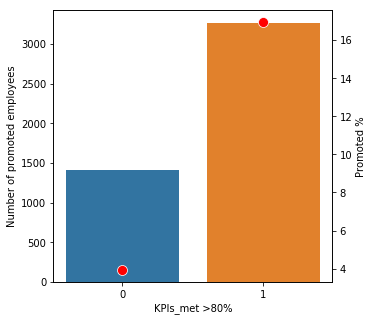

In [31]:
table6=pd.crosstab(train["KPIs_met >80%"],train["is_promoted"])
table6["Total"]=table6["No"]+table6["Yes"]
table6["Total"]=table6["Yes"]+table6["No"]
table6["Promoted %"]=(table6["Yes"]/table6["Total"])*100

fig,ax1=plt.subplots(figsize=(5,5))
sns.barplot(x=table6.index,y=table6["Yes"],ax=ax1)
ax1.set(ylabel="Number of promoted employees")
ax2=ax1.twinx()
sns.scatterplot(table6.index,table6['Promoted %'],ax=ax2,color="red",s=100)
table6

is_promoted,No,Yes,Total,Promoted %
Age_Binned,,,,
"(10, 20]",109,4,113,3.539823
"(20, 30]",16459,1546,18005,8.586504
"(30, 40]",23669,2359,26028,9.063316
"(40, 50]",7242,568,7810,7.272727
"(50, 60]",2661,191,2852,6.697055


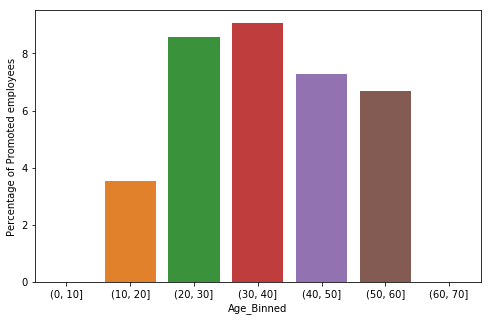

In [32]:
train_copy=train.copy()
bins = [0, 10, 20, 30, 40, 50, 60, 70]
train_copy["Age_Binned"] = pd.cut(train['age'], bins)
table7=pd.crosstab(train_copy["Age_Binned"],train["is_promoted"])
table7["Total"]=table7["Yes"]+table7["No"]
table7['Promoted %']=(table7["Yes"]/(table7["Yes"]+table7["No"]))*100

fig,ax1=plt.subplots(figsize=(8,5))
sns.barplot(x=table7.index,y=table7["Promoted %"],ax=ax1)
ax1.set(ylabel="Percentage of Promoted employees")
table7

is_promoted,No,Yes,Total,Promoted %
Score_Binned,,,,
"(30, 60]",26670,1353,28023,4.828177
"(60, 90]",23399,2807,26206,10.711287
"(90, 100]",71,508,579,87.737478


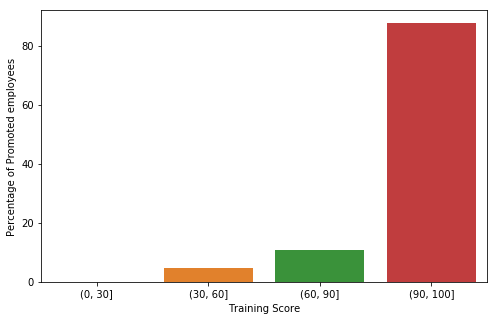

In [33]:
bins = [0, 30, 60, 90, 100]
train_copy["Score_Binned"] = pd.cut(train['avg_training_score'], bins)
table8=pd.crosstab(train_copy["Score_Binned"],train["is_promoted"])
table8["Total"]=table8["Yes"]+table8["No"]
table8['Promoted %']=(table8["Yes"]/(table8["Yes"]+table8["No"]))*100

fig,ax1=plt.subplots(figsize=(8,5))
sns.barplot(x=table8.index,y=table8["Promoted %"],ax=ax1)
ax1.set(ylabel="Percentage of Promoted employees")
ax1.set(xlabel="Training Score")
table8

is_promoted,No,Yes,Total,Promoted %
Work_Binned,,,,
"(0, 6]",32611,3055,35666,8.565581
"(6, 12]",13641,1325,14966,8.853401
"(12, 18]",2983,218,3201,6.810372
"(18, 24]",672,59,731,8.071135
"(24, 30]",192,8,200,4.000000
"(30, 36]",40,3,43,6.976744
"(36, 42]",1,0,1,0.000000


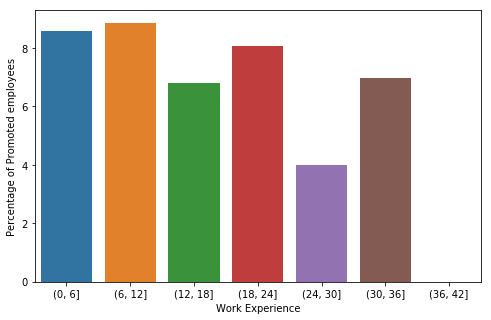

In [34]:
bins = [0, 6, 12, 18, 24, 30, 36, 42]
train_copy["Work_Binned"] = pd.cut(train['length_of_service'], bins)
table9=pd.crosstab(train_copy["Work_Binned"],train["is_promoted"])
table9["Total"]=table9["Yes"]+table9["No"]
table9['Promoted %']=(table9["Yes"]/(table9["Yes"]+table9["No"]))*100

fig,ax1=plt.subplots(figsize=(8,5))
sns.barplot(x=table9.index,y=table9["Promoted %"],ax=ax1)
ax1.set(ylabel="Percentage of Promoted employees")
ax1.set(xlabel="Work Experience")
table9

# Inferences from Bivariate Analysis

1) Sales and Marketing department has highest number of employees and also highest number of employees who got promoted which is (about 1213), but percentage of employees getting promoted isn't that promising which is about (7.2%) which makes up about 1213 of 16840 employees in the department. Where as Technology department has highest percentage of promoted employees which is (About 10.76%) which is about 768 out of 7138 employees in the department.

2) Region 2 has highest number of employees and the dominating region the dataset, shows descent percentage of promotion (about 8.012%) which comes out to be 989 out of 12343 total employees in the region. Region 4 has proportionaly highest percent(14.445%) employees being promoted.

3) Highest number of Employees with Bachelor's degree has been promoted which is about (3008), but percentage doesn't show that promising number as it's around (8.203%) which is about (3008 out of 36669 employees with Bachelor's degree). Employees with Master's degree has highest percentage of promoted employees which is about (9.856%) which is logically understandable.

4) Percentage of Males and Females employees who are promoted is almost similar, even after dataset is having great gender imbalance with majority of employees being Male.

5) Awards winning does have an impact on Promotion. About 44.02% employees got promotion who have won awards during the service i.e. (559 of 1270 employees) who have won awards got promoted. Which is logically correct

6) The chances of getting a promotion is pretty descent if you have met the criteria of Key Performance Indicator. About 17% employees got promoted who have met the criteria related to KPI (Key performance Indiacator) i.e (3262 out 19291 employees who have met KPI criteria got promoted) .

7) Majority of employees belonging to age group 20-30 and 31-40 have high percentage of Promotions. As mojority of total employees belong to these age groups.

8) Employees with Avergae training score in range 90-100 has massive chance of getting promoted which is about 87.74%, showing 508 out of 579 employees who have met KPI criteria got promoted which really a good rate. Which is logically acceptable since high average training score indicates better performance by the employee during the training 

9) Good percentage of employees having Work Experience of 0-5 years and 6-12 years got promoted. Which is (8.566%) and (8.8534%) respectivley. Followed by the age group 18-23 which has 8.071% of employees who got promoted.

# Multivariate Analysis

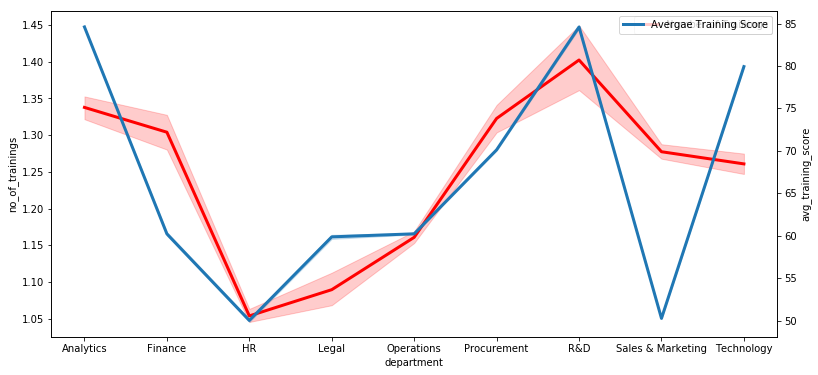

In [35]:
fig,ax1=plt.subplots(figsize=(13,6))
sns.lineplot(train["department"],train["no_of_trainings"],ax=ax1,linewidth=3,color='red',label="Number of Trainings")
ax2=ax1.twinx()
sns.lineplot(train["department"],train["avg_training_score"],ax=ax2,linewidth=3,label="Avergae Training Score")

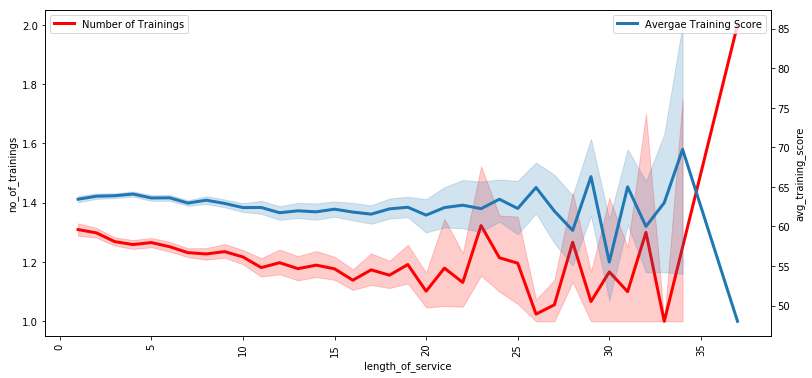

In [36]:
fig,ax1=plt.subplots(figsize=(13,6))
plt.xticks(rotation=90)
sns.lineplot(train["length_of_service"],train["no_of_trainings"],ax=ax1,linewidth=3,color='red',label="Number of Trainings")
ax2=ax1.twinx()
sns.lineplot(train["length_of_service"],train["avg_training_score"],ax=ax2,linewidth=3,label="Avergae Training Score")

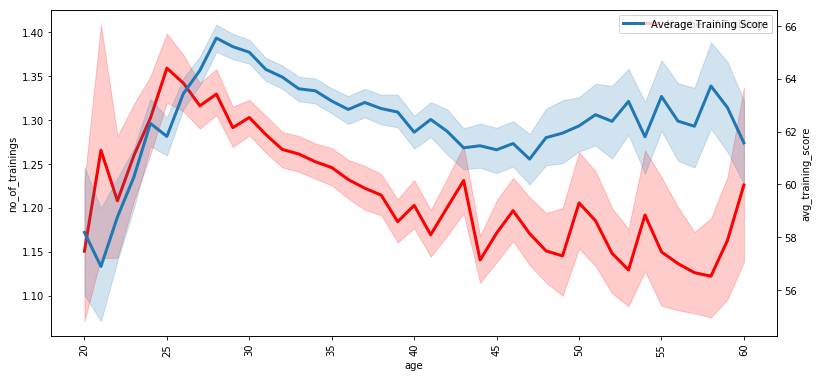

In [37]:
fig,ax1=plt.subplots(figsize=(13,6))
plt.xticks(rotation=90)
sns.lineplot(train["age"],train["no_of_trainings"],ax=ax1,linewidth=3,color='red',label="Number of Trainings")
ax2=ax1.twinx()
sns.lineplot(train["age"],train["avg_training_score"],ax=ax2,linewidth=3,label="Average Training Score")

In [38]:
list(train)

['employee_id',
 'department',
 'region',
 'education',
 'gender',
 'recruitment_channel',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

# Inferences from Multivariate Analysis
1) R&D department has highest number of trainings conducted also employees of that department seems to be performing really as well. Sales and Marketing employees seems to have below par performance in training as their average training score is the lowest.

2) Employees with lower age (approx <27) have to go through higher number of trainings, seems to be performing mediocre. As we move towards higher age number of trainings drop down, showing better performance by employees with higher average training score.

3) Number of trainings and Average training score is proportionate till (approx 33 years of work experience) after which number of trainings goes up drastically with severe drop in average training score.